# EDA and visualization using Pandas and seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('C:\\Users\\jaime\\Jupyter Notebooks\\Python for Data Science\\911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#What are the type 10 ip codes for 911 calls?
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [8]:
#What are the top 10 townships(twp) for 911 calls?
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [9]:
# How many unique title codes are there?
df['title'].nunique()

110

In [10]:
len(df['title'].unique())

110

In [14]:
df['title'].iloc[0] # we want to split the title column into a new column called 'Reason' where we would break the title contents into a code and a reason

'EMS: BACK PAINS/INJURY'

In [12]:
# create a new column called 'Reason'
x= df['title'].iloc[0]
x.split(':')[0]

'EMS'

In [15]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [17]:
df['Reason'].head(10)

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: Reason, dtype: object

In [19]:
#what is the most common 'Reason' for 911 calls based on this new column
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

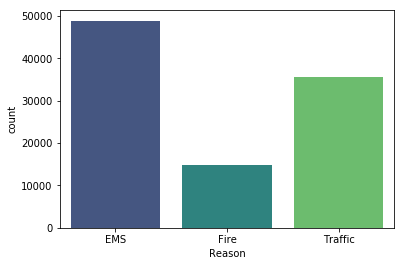

In [23]:
# Use seaborn to creat a countplot of 911 calls by reason
sns.countplot(x='Reason', data=df, palette= 'viridis');

In [25]:
df.info() #What types of data are we working with here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [27]:
df['timeStamp'].iloc[0] #time stamp was some sort of object, call on it and see what it is. looks like a string

'2015-12-10 17:40:00'

In [28]:
type(df['timeStamp'].iloc[0]) #confirm this with the type() method

str

In [29]:
#convert timeStamp to datetime 
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [33]:
time = df['timeStamp'].iloc[0]

In [32]:
type(df['timeStamp'].iloc[0]) # We have successfully changed the attribute

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
time

Timestamp('2015-12-10 17:40:00')

In [35]:
time.hour

17

In [36]:
time.year

2015

In [37]:
time.month

12

In [38]:
time.dayofweek

3

In [39]:
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)

In [40]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [41]:
# Creating new columns and converting the timeStamp info into Month and Day of Week
df['Month']= df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)

In [42]:
df.head() # Double check that is the case

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [43]:
#the Day of Week column is an integer, we are going to map the actual string names to the day of the week.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [44]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


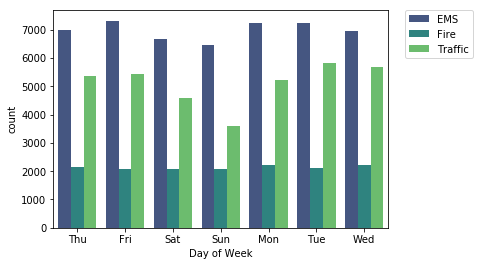

In [49]:
#Let's make a count plot of the Day of Week column with the hue based off of the reason column
sns.countplot(x='Day of Week',data=df, hue='Reason', palette= 'viridis');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

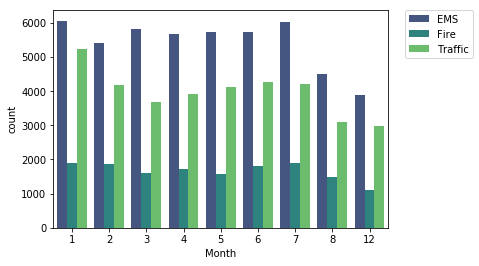

In [50]:
#Do the same for the month
sns.countplot(x='Month',data=df, hue='Reason', palette= 'viridis');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

In [51]:
#We are missing some months, need to correct this by changing the ploty
#let's try a line plot
byMonth=df.groupby('Month').count()

In [52]:
byMonth.head() # counted every instance of the column by month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


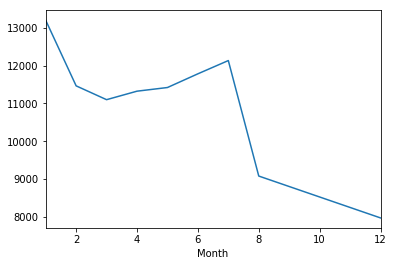

In [54]:
byMonth['lat'].plot();

No handles with labels found to put in legend.


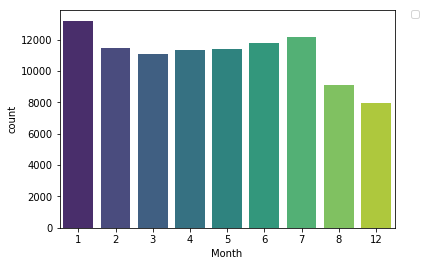

In [55]:
sns.countplot(x='Month',data=df, palette= 'viridis');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

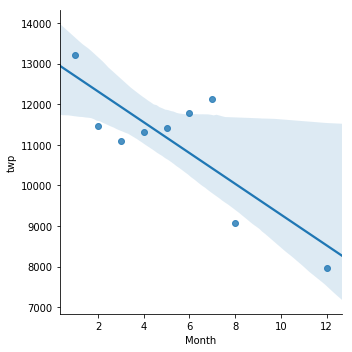

In [58]:

sns.lmplot(x='Month', y='twp',data=byMonth.reset_index());

In [61]:
#Create a new column called 'Date' that contains the date from the timeStamp column
t=df['timeStamp'].iloc[0]

In [63]:
t

Timestamp('2015-12-10 17:40:00')

In [62]:
t.date()

datetime.date(2015, 12, 10)

In [64]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

In [65]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [66]:
#groupby this new Date column with the count() aggregate and create a plot of counts of 911 calls
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


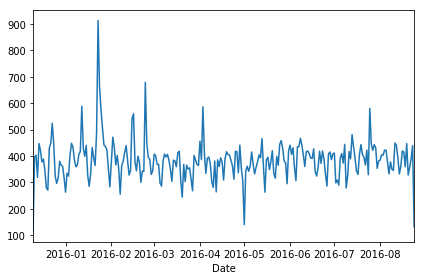

In [68]:
df.groupby('Date').count()['lat'].plot();
plt.tight_layout()

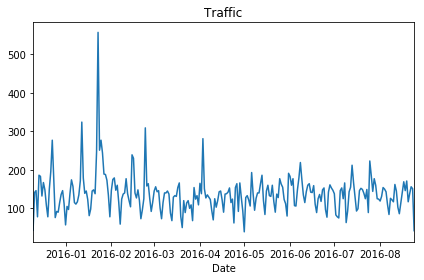

In [76]:
# recreate the plots but split by the reason columns
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot();#plotting by Traffic
plt.title('Traffic')
plt.tight_layout()

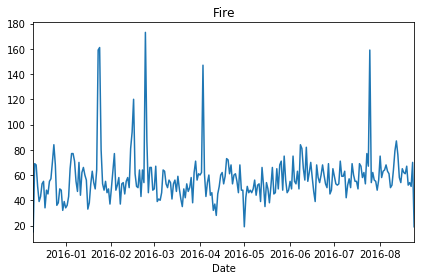

In [75]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot(); #plotting by Fire
plt.title('Fire')
plt.tight_layout()

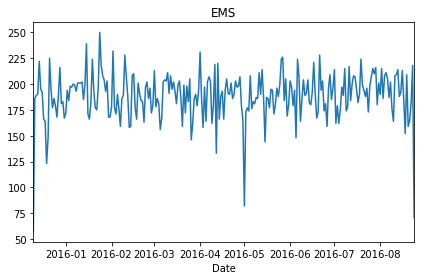

In [74]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot(); #plotting by EMS
plt.title('EMS')
plt.tight_layout()

In [77]:
#Create heatmaps. Need our data to be in matrix form
df.groupby(by=['Day of Week', 'Hour']).count() # a multilevel index

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [79]:
dayHour=df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack() #gives us our matrix form. One column is index, one is column.

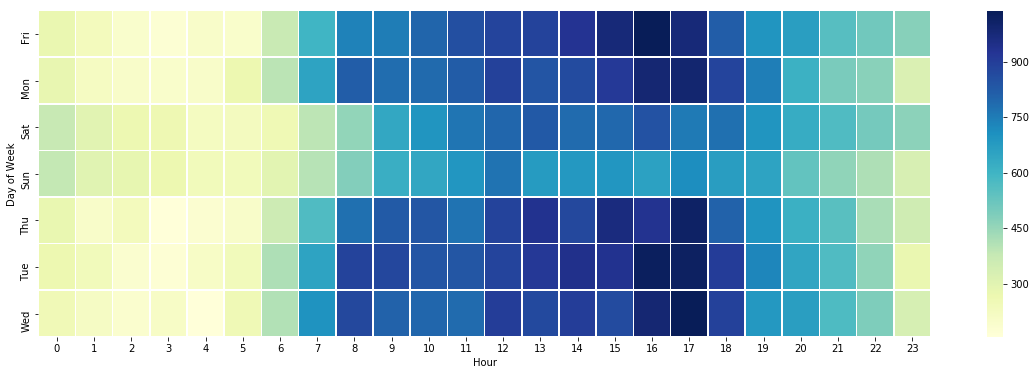

In [85]:
plt.figure(figsize=(20,6))
sns.heatmap(dayHour,cmap='YlGnBu', linewidths=.5);

<Figure size 1440x432 with 0 Axes>

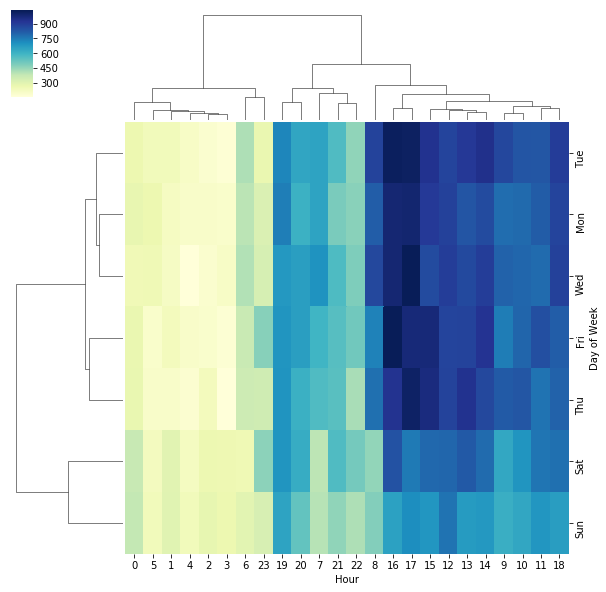

In [88]:
#creating a cluster map
plt.figure(figsize=(20,6))
sns.clustermap(dayHour,cmap='YlGnBu');

In [89]:
#Repeate for the month
dayMonth=df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


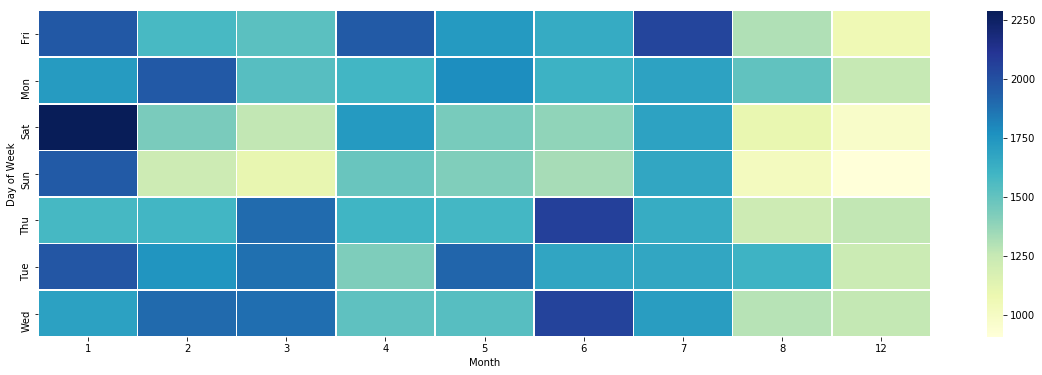

In [90]:
plt.figure(figsize=(20,6))
sns.heatmap(dayMonth,cmap='YlGnBu', linewidths=.5);

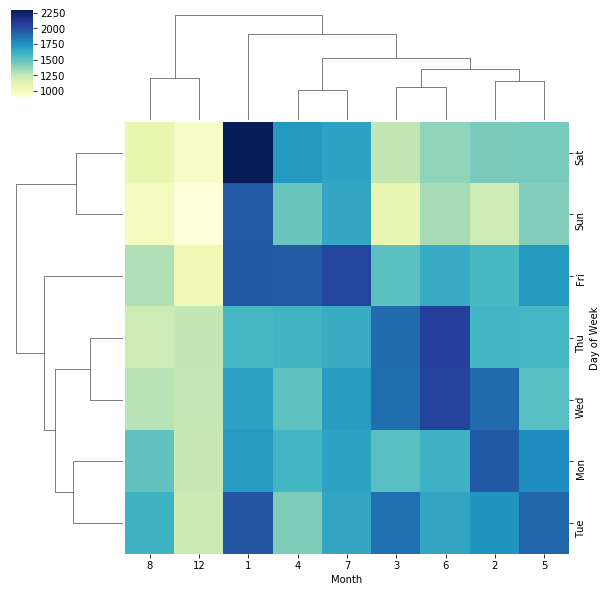

In [91]:
sns.clustermap(dayMonth,cmap='YlGnBu');

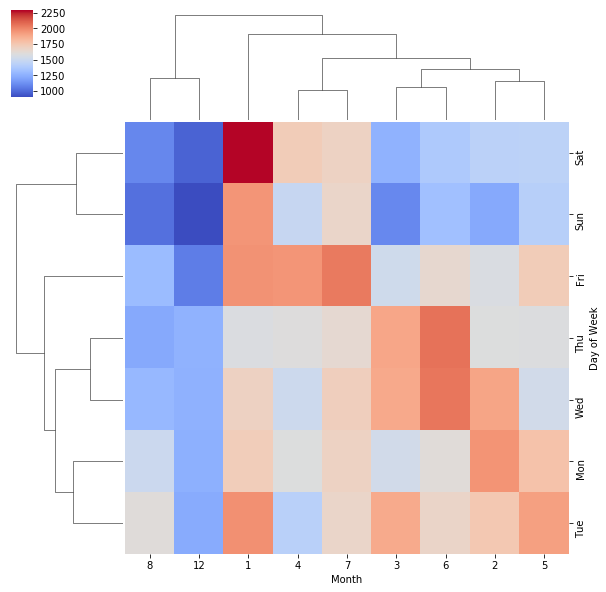

In [92]:
sns.clustermap(dayMonth,cmap='coolwarm');